<a href="https://colab.research.google.com/github/WillHK/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
!pip install pandas==0.23.4
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [2]:
col_names= ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
cc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names=col_names, na_values='?')
cc_data['A15'] = cc_data['A15'].astype('float')
cc_data['A11'] = cc_data['A11'].astype('float')
cc_data.head(100)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0.0,f,s,120.0,0.0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0.0,t,g,360.0,0.0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0.0,t,g,164.0,31285.0,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0.0,f,g,80.0,1349.0,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0.0,f,g,180.0,314.0,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0.0,t,g,52.0,1442.0,+


In [3]:
cc_data.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [4]:
cc_data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
# Dropping NA data since I don't have enough grasp on the data to decide how to
# appropriately handle it.

cc_data = cc_data.dropna()
cc_data.isna().sum().sum()

0

In [0]:
# Categorical boolean mask
categorical_feature_mask = cc_data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cc_data.columns[categorical_feature_mask].tolist()

In [7]:
le = LabelEncoder()
cc_data[categorical_cols] = cc_data[categorical_cols].apply(lambda col: le.fit_transform(col))
cc_data[categorical_cols].head(10)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,1,1,0,12,7,1,1,0,0,0
1,0,1,0,10,3,1,1,0,0,0
2,0,1,0,10,3,1,0,0,0,0
3,1,1,0,12,7,1,1,1,0,0
4,1,1,0,12,7,1,0,0,2,0
5,1,1,0,9,7,1,0,1,0,0
6,1,1,0,11,3,1,0,1,0,0
7,0,1,0,2,7,1,0,0,0,0
8,1,2,2,8,3,1,0,0,0,0
9,1,2,2,12,7,1,0,1,0,0


In [8]:
cc_data.describe(include='all')

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.689127,31.503813,4.829533,1.229709,0.468606,5.773354,5.084227,2.244296,0.534456,0.439510,2.502297,0.462481,0.165391,180.359877,1013.761103,0.546708
std,0.463206,11.838267,5.027077,0.428193,0.845963,4.296249,2.494278,3.371120,0.499194,0.496708,4.968497,0.498973,0.548475,168.296811,5253.278504,0.498195
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,0.000000
50%,1.000000,28.420000,2.835000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,38.250000,7.500000,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.000000,1.000000,0.000000,272.000000,400.000000,1.000000
max,1.000000,76.750000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,2000.000000,100000.000000,1.000000


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, bayes_mvs
from scipy.stats import chisquare

In [10]:
# TODO
accepted_applications = cc_data[cc_data['A16'] == 0]
rejected_applications = cc_data[cc_data['A16'] == 1]
rejected_applications.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,1,32.33,7.50,1,0,4,0,1.585,1,0,0.0,1,2,420.0,0.0,1
72,0,38.58,5.00,1,0,2,7,13.500,1,0,0.0,1,0,980.0,0.0,1
73,1,44.25,0.50,1,0,9,7,10.750,1,0,0.0,0,2,400.0,0.0,1
74,1,44.83,7.00,2,2,1,7,1.625,0,0,0.0,0,0,160.0,2.0,1
75,1,20.67,5.29,1,0,10,7,0.375,1,1,1.0,0,0,160.0,0.0,1


(Mean(statistic=33.84547297297297, minmax=(32.62848302540627, 35.06246292053967)), Variance(statistic=162.11888782861362, minmax=(141.34726974722543, 185.3940315554793)), Std_dev(statistic=12.721732228385616, minmax=(11.888955788765701, 13.6159476921542)))
(Mean(statistic=29.562268907563023, minmax=(28.626678315938364, 30.497859499187683)), Variance(statistic=115.54972164459004, minmax=(102.00713622100054, 130.57052703717517)), Std_dev(statistic=10.74181694332664, minmax=(10.099858227767385, 11.426746126399028)))
4.675662433767456
3.5636710933835225e-06
True


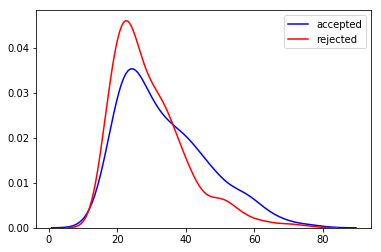

In [37]:
# Both peak at a similar number but rejected has a higher concentration at the peak and drops off quickly while accepted has a longer tail
# P-value is sufficiently low to suggest we can reject the null hypothesis and dig deeper

sns.kdeplot(accepted_applications['A2'], color='b', label='accepted')
sns.kdeplot(rejected_applications['A2'], color='r', label='rejected')

stat, pvalue = ttest_ind(accepted_applications['A2'], rejected_applications['A2'])
print(bayes_mvs(accepted_applications['A2']))
print(bayes_mvs(rejected_applications['A2']))
print(stat)
print(pvalue)
print(pvalue <= 0.01)

4.475369764700449
True


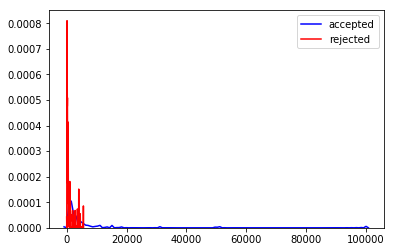

In [43]:
# the massive amount of 0s in this column makes me very unsure of the data, not going to analyze this.
# The p-value suggests we can reject the null hypothesis, though I'm unsure where to start. Maybe eliminate 0s and see how the data looks

sns.kdeplot(accepted_applications['A15'], color='b', label='accepted')
sns.kdeplot(rejected_applications['A15'], color='r', label='rejected');

stat, pvalue = ttest_ind(accepted_applications['A15'], rejected_applications['A15'])
print(stat)
print(pvalue <= 0.01)

In [0]:
a4_data = pd.cut(cc_data['A4'], bins=2)
a4_cross = pd.crosstab(index=a4_data, columns=cc_data['A16'])
# accepted_applications.T

Power_divergenceResult(statistic=198.30168453292495, pvalue=9.820041658673719e-43)

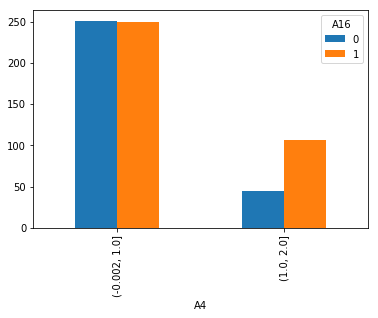

In [89]:
# Chi squared suggests we can't reject the null hypothesis and this data may 
# follow a standard distribution
# fig, ax = plt.subplots(2)
# ax[0] = sns.barplot(accepted_applications[accepted_applications['A4'] > 0 ]['A4'], accepted_applications[accepted_applications['A4'] > 0]['A4'], color='b', label='accepted', ax=ax[0])
# sns.distplot(accepted_applications['A4'], ax=ax[0], kde=True)
# sns.distplot(rejected_applications['A4'], ax=ax[1])
# ax[1].set_xticks([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2])
# ax[1].set_xlim(0,2)
a4_cross.plot.bar()
chisquare(a4_cross, axis=None)

In [0]:
bin_cc_data = pd.cut(cc_data['A10'], bins=6)
bin_cross = pd.crosstab(index=bin_cc_data, columns=cc_data['A16'])

Power_divergenceResult(statistic=152.16385911179174, pvalue=8.994150430808612e-33)


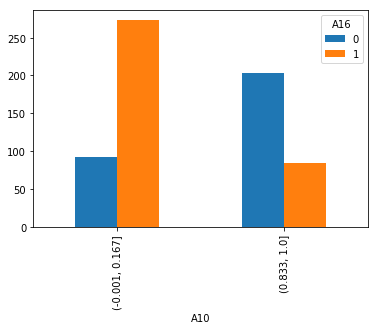

In [95]:
# sns.kdeplot(bin_cross, color='b', label='accepted')
bin_cross.plot.bar()
# sns.kdeplot(rejected_applications['A4'], color='r', label='rejected')
print(chisquare(bin_cross, axis=None));

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.



# Analysis of A2 column
Using a kdeplot and a ttest I was able to determine the accepted applicants had a higher mean value which suggests a higher score here led to a better acceptance rate

# Analysis of A15 column
The rejected group was very heavy on the low end here and had almost none at the high values, while the accepted group also had a large amount of values near 0 but also had enough high values to significantly pull it's mean higher, leading to the conclusion that higher values here also led to higher acceptance rates.

# Analysis of A4 column
After converting the A4 column to categorical encoding and making a crosstab, I plotted it using a side-by-side bar plot which showed while both accepted and rejected had similar numbers of the 'u' value, 'y' was more weighted on the rejected side than the accepted side. The chisquared backed this up and suggested there was a correlation between the value and acceptance.

# Analysis of A10 column
After converting the t/f values to 1/0 respectively I made a crosstab of A10 and the A16 accept/reject value, after making a barplot of this it became apparent that those who were rejected had much higher true values here than those who were accepted, leading me to believe this is an important value for a decision on whether to offer credit.

# Most challenging part of sprint challenge
I'd say the most challenging part here was trying to make heads or tails of the data as the labels we were given didn't have data that I found relevant to getting that first jump on the data. Without that initial intuition on what the data is it was difficult for me to make an accurate analysis beyond just stating that the feature probably had an effect on acceptance rates. In order to improve upon this I intend on doing work outside of class to improve my basic statistics knowledge so I can glean more data from the calculations I did on the data.
